In [2]:
import pandas as pd 
import numpy as np 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import sys
import os
sys.path.append(os.path.abspath('..'))
from src.LDA import get_LDA, LDA_projected_data, Test_LDA
from src.PCA import Test_PCA

In [3]:
df = pd.read_json("../Data/data_frame.json", orient='records', lines=True)
D = np.stack(df['image_vector'].values)
y = df['label'].values 

X_train = D[: : 2]
X_test = D[1: : 2]

y_train = y[: : 2]
y_test = y[1: : 2]

In [4]:
LDA_projection_matrix = get_LDA(X_train,y_train)
print(LDA_projection_matrix.shape)

(10304, 39)


In [5]:
print("LDA Accuracy: " + str(Test_LDA(X_train, X_test, y_train, y_test, LDA_projection_matrix,1)))

LDA Accuracy: 0.95


In [6]:
k_values = [1, 3, 5, 7, 9]

# Initialize a list to store the results
results = []
projected_X_train, projected_X_test = LDA_projected_data(X_train,X_test,LDA_projection_matrix)
# Loop over the values of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights="distance")
    knn.fit(projected_X_train, y_train.ravel())
    y_pred = knn.predict(projected_X_test)
    accuracy = accuracy_score(y_test, y_pred.ravel())
    results.append({"accuracy": accuracy})

# Convert the results to a DataFrame
df = pd.DataFrame(results, index=k_values)
df.index.name = "k"
df

,accuracy
k,
1,0.95
3,0.95
5,0.95
7,0.95
9,0.95


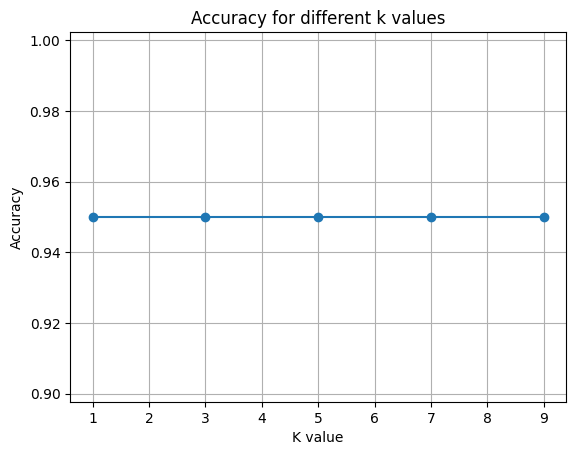

In [7]:
import matplotlib.pyplot as plt
plt.plot(df, marker="o")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("Accuracy for different k values")
plt.grid(True)
plt.show()

In [9]:

alpha = [0.8, 0.85, 0.9, 0.95]
k_values = [1, 3, 5, 7, 9]
variants = [
    "PCA α = 0.8",
    "PCA α = 0.85",
    "PCA α = 0.9",
    "PCA α = 0.95",
    "LDA",
]
df = pd.DataFrame(index=variants, columns=k_values)
for num_dominant_eigen_vectors in alpha:
    for k in k_values:
        for i in range(4):
            pca_accuracy = Test_PCA(X_train,X_test,y_train,y_test,alpha[i], k)
            df.loc[variants[i], k] = str(pca_accuracy * 100) + "%"
        lda_accuracy = Test_LDA(X_train, X_test, y_train, y_test, LDA_projection_matrix,k)
        df.loc["LDA", k] = str(lda_accuracy * 100) + "%"
df

,1,3,5,7,9
PCA α = 0.8,94.0%,90.5%,89.5%,88.0%,83.5%
PCA α = 0.85,94.0%,90.0%,89.5%,85.5%,83.0%
PCA α = 0.9,94.0%,90.5%,89.0%,85.5%,81.5%
PCA α = 0.95,93.0%,90.0%,86.5%,83.0%,80.5%
LDA,95.0%,95.0%,95.0%,95.0%,95.0%
